<a href="https://colab.research.google.com/github/soma2000-lang/Spark-internship/blob/main/Stock_Market_Prediction_using_Numerical_and_Textual_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Name: SOMASREE MAJUMDER

The Sparks Foundation

Graduate Rotational Internship Program (GRIP) MAY2021 Batch

Data Science & Business Analytics

Task-Stock Market Prediction using
Numerical and Textual Analysis


In [9]:
# importing libraries
import warnings
warnings.filterwarnings('ignore')

import math
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing, metrics
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Dense, Activation

import nltk
nltk.download('vader_lexicon')
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [13]:
pip install vaderSentiment

In [14]:
# reading the datasets into pandas
stock_price = pd.read_csv('/content/MSFT.csv')
stock_headlines = pd.read_csv('/content/india-news-headlines.csv')

In [15]:
stock_price.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-05-15,179.059998,187.059998,177.000000,183.160004,181.317429,46610400
1,2020-05-18,185.750000,186.199997,183.960007,184.910004,183.049850,35264500
2,2020-05-19,185.029999,186.600006,183.490005,183.630005,181.782730,26799100
3,2020-05-20,184.809998,185.850006,183.940002,185.660004,184.304169,31261300
4,2020-05-21,185.399994,186.669998,183.289993,183.429993,182.090454,29119500


In [16]:
stock_headlines.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [17]:
stock_headlines.isna().any()

publish_date         False
headline_category     True
headline_text         True
dtype: bool

In [18]:
stock_price.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [19]:
# concatenation of the datasets stock_price and stock_headlines
stock_data = pd.concat([stock_price, stock_headlines], axis=1)

stock_data.dropna(axis=0, inplace=True)

# displaying the combined stock_data
stock_data

,Date,Open,High,Low,Close,Adj Close,Volume,publish_date,headline_category,headline_text
0,2020-05-15,179.059998,187.059998,177.000000,183.160004,181.317429,46610400.0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,2020-05-18,185.750000,186.199997,183.960007,184.910004,183.049850,35264500.0,20010102,unknown,Fissures in Hurriyat over Pak visit
2,2020-05-19,185.029999,186.600006,183.490005,183.630005,181.782730,26799100.0,20010102,unknown,America's unwanted heading for India?
3,2020-05-20,184.809998,185.850006,183.940002,185.660004,184.304169,31261300.0,20010102,unknown,For bigwigs; it is destination Goa
4,2020-05-21,185.399994,186.669998,183.289993,183.429993,182.090454,29119500.0,20010102,unknown,Extra buses to clear tourist traffic
...,...,...,...,...,...,...,...,...,...,...
247,2021-05-10,250.869995,251.729996,247.119995,247.179993,247.179993,29299900.0,20010104,unknown,New office-bearers for ICSI
248,2021-05-11,244.550003,246.600006,242.570007,246.229996,246.229996,33641600.0,20010104,unknown,CM to review security for Premji; Murthy
249,2021-05-12,242.169998,244.380005,238.070007,239.000000,239.000000,36684400.0,20010104,unknown,Govt allots UKP project to KPC
250,2021-05-13,241.800003,245.600006,241.419998,243.029999,243.029999,29624300.0,20010104,unknown,Star hotels in city get tech-savvy


In [20]:
stock_headlines.columns

Index(['publish_date', 'headline_category', 'headline_text'], dtype='object')

In [21]:
stock_price.isna().any()

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [22]:
len(stock_price), len(stock_headlines)

(252, 439173)

In [23]:
stock_price.isna().any(), stock_headlines.isna().any()

(Date         False
 Open         False
 High         False
 Low          False
 Close        False
 Adj Close    False
 Volume       False
 dtype: bool, publish_date         False
 headline_category     True
 headline_text         True
 dtype: bool)

In [24]:

stock_data['compound'] = ''
stock_data['negative'] = ''
stock_data['neutral'] = ''
stock_data['positive'] = ''
stock_data.head()


,Date,Open,High,Low,Close,Adj Close,Volume,publish_date,headline_category,headline_text,compound,negative,neutral,positive
0,2020-05-15,179.059998,187.059998,177.000000,183.160004,181.317429,46610400.0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...,,,,
1,2020-05-18,185.750000,186.199997,183.960007,184.910004,183.049850,35264500.0,20010102,unknown,Fissures in Hurriyat over Pak visit,,,,
2,2020-05-19,185.029999,186.600006,183.490005,183.630005,181.782730,26799100.0,20010102,unknown,America's unwanted heading for India?,,,,
3,2020-05-20,184.809998,185.850006,183.940002,185.660004,184.304169,31261300.0,20010102,unknown,For bigwigs; it is destination Goa,,,,
4,2020-05-21,185.399994,186.669998,183.289993,183.429993,182.090454,29119500.0,20010102,unknown,Extra buses to clear tourist traffic,,,,


In [25]:
pip install unicodedata

ERROR: Could not find a version that satisfies the requirement unicodedata (from versions: none)
ERROR: No matching distribution found for unicodedata


In [27]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata

#Sentiment Analyzer
sid = SentimentIntensityAnalyzer()
print('Start calculating sentiment scores:')

stock_data['compound'] = stock_data['headline_text'].apply(lambda x: sid.polarity_scores(x)['compound'])
print('Compound Done')
stock_data['negative'] = stock_data['headline_text'].apply(lambda x: sid.polarity_scores(x)['neg'])
print('Negative Done')
stock_data['neutral'] = stock_data['headline_text'].apply(lambda x: sid.polarity_scores(x)['neu'])
print('Neutral Done')
stock_data['positive'] = stock_data['headline_text'].apply(lambda x: sid.polarity_scores(x)['pos'])
print('Positive Done')
print('Stop')

stock_data.head()


Start calculating sentiment scores:
Compound Done
Negative Done
Neutral Done
Positive Done
Stop


,Date,Open,High,Low,Close,Adj Close,Volume,publish_date,headline_category,headline_text,compound,negative,neutral,positive
0,2020-05-15,179.059998,187.059998,177.000000,183.160004,181.317429,46610400.0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...,0.2924,0.000,0.805,0.195
1,2020-05-18,185.750000,186.199997,183.960007,184.910004,183.049850,35264500.0,20010102,unknown,Fissures in Hurriyat over Pak visit,0.0000,0.000,1.000,0.000
2,2020-05-19,185.029999,186.600006,183.490005,183.630005,181.782730,26799100.0,20010102,unknown,America's unwanted heading for India?,-0.2263,0.322,0.678,0.000
3,2020-05-20,184.809998,185.850006,183.940002,185.660004,184.304169,31261300.0,20010102,unknown,For bigwigs; it is destination Goa,0.0000,0.000,1.000,0.000
4,2020-05-21,185.399994,186.669998,183.289993,183.429993,182.090454,29119500.0,20010102,unknown,Extra buses to clear tourist traffic,0.3818,0.000,0.658,0.342


In [28]:
# dropping unwanted 'headline_text' and rearranging columns
stock_data.drop(['headline_text'], inplace=True, axis=1)
stock_data = stock_data[['Close', 'compound', 'negative', 'neutral', 'positive', 'Open', 'High', 'Low', 'Volume']]

# final stock_data
stock_data.head()


,Close,compound,negative,neutral,positive,Open,High,Low,Volume
0,183.160004,0.2924,0.000,0.805,0.195,179.059998,187.059998,177.000000,46610400.0
1,184.910004,0.0000,0.000,1.000,0.000,185.750000,186.199997,183.960007,35264500.0
2,183.630005,-0.2263,0.322,0.678,0.000,185.029999,186.600006,183.490005,26799100.0
3,185.660004,0.0000,0.000,1.000,0.000,184.809998,185.850006,183.940002,31261300.0
4,183.429993,0.3818,0.000,0.658,0.342,185.399994,186.669998,183.289993,29119500.0


In [29]:
stock_data.isna().any()

Close       False
compound    False
negative    False
neutral     False
positive    False
Open        False
High        False
Low         False
Volume      False
dtype: bool

In [30]:

stock_data.describe(include='all')

,Close,compound,negative,neutral,positive,Open,High,Low,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,219.316706,0.005263,0.085472,0.827500,0.087032,219.183452,221.573056,216.875119,3.115288e+07
std,19.167880,0.292760,0.163656,0.227735,0.170704,19.159874,19.058986,19.250526,9.955485e+06
min,181.399994,-0.822500,0.000000,0.270000,0.000000,179.059998,181.990005,176.600006,1.055060e+07
25%,207.379997,0.000000,0.000000,0.648000,0.000000,207.652500,210.162495,204.802505,2.430058e+07
50%,215.404999,0.000000,0.000000,1.000000,0.000000,214.860001,216.964997,213.095001,2.946080e+07
75%,232.992496,0.000000,0.000000,1.000000,0.000000,232.887505,235.490005,231.162506,3.531592e+07
max,261.970001,0.855500,0.683000,1.000000,0.730000,261.660004,263.190002,260.170013,7.898300e+07


In [31]:
# displaying stock_data information
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252 entries, 0 to 251
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Close     252 non-null    float64
 1   compound  252 non-null    float64
 2   negative  252 non-null    float64
 3   neutral   252 non-null    float64
 4   positive  252 non-null    float64
 5   Open      252 non-null    float64
 6   High      252 non-null    float64
 7   Low       252 non-null    float64
 8   Volume    252 non-null    float64
dtypes: float64(9)
memory usage: 19.7 KB


Text(0, 0.5, 'Close Price (INR)')

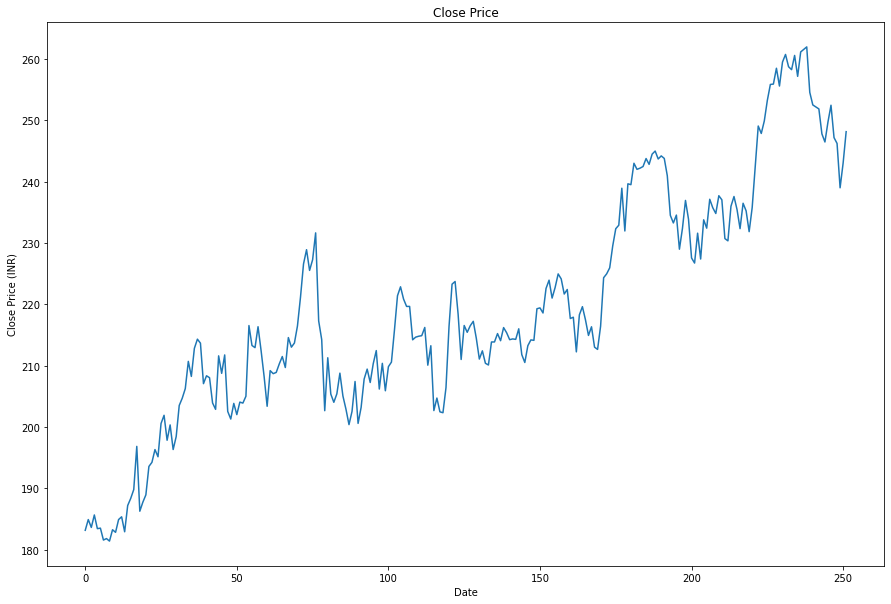

In [32]:
#Setting plot size and labels
plt.figure(figsize=(15,10))

stock_data['Close'].plot()


plt.title("Close Price")
plt.xlabel('Date')
plt.ylabel('Close Price (INR)')

In [33]:
# calculating 7 day rolling mean
stock_data.rolling(7).mean().head(20)

,Close,compound,negative,neutral,positive,Open,High,Low,Volume
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,183.695716,0.063986,0.046000,0.877286,0.076714,184.225712,186.191430,182.188572,3.227933e+07
7,183.502858,0.022214,0.046000,0.905143,0.048857,184.388569,185.467146,182.131430,3.126600e+07
8,183.001428,0.082429,0.087857,0.811571,0.100571,183.672856,185.174288,181.620001,3.105824e+07
9,182.947142,0.114757,0.041857,0.857571,0.100571,183.344284,184.841431,181.180001,3.324843e+07


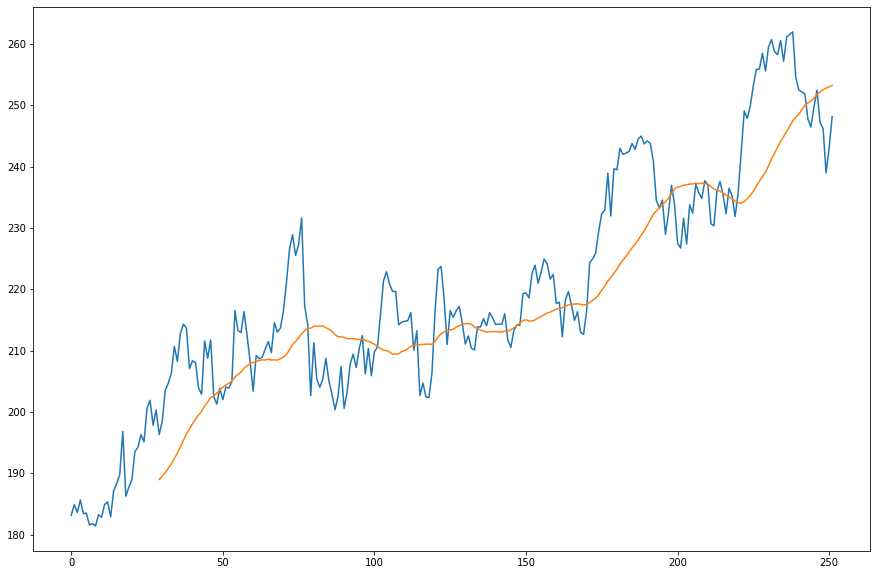

In [34]:

# setting figure size
plt.figure(figsize=(15,10))

# plotting the close price and a 30-day rolling mean of close price
stock_data['Close'].plot()
stock_data.rolling(window=30).mean()['Close'].plot()

In [35]:
# displaying stock_data
stock_data

,Close,compound,negative,neutral,positive,Open,High,Low,Volume
0,183.160004,0.2924,0.000,0.805,0.195,179.059998,187.059998,177.000000,46610400.0
1,184.910004,0.0000,0.000,1.000,0.000,185.750000,186.199997,183.960007,35264500.0
2,183.630005,-0.2263,0.322,0.678,0.000,185.029999,186.600006,183.490005,26799100.0
3,185.660004,0.0000,0.000,1.000,0.000,184.809998,185.850006,183.940002,31261300.0
4,183.429993,0.3818,0.000,0.658,0.342,185.399994,186.669998,183.289993,29119500.0
...,...,...,...,...,...,...,...,...,...
247,247.179993,0.0000,0.000,1.000,0.000,250.869995,251.729996,247.119995,29299900.0
248,246.229996,0.3400,0.000,0.714,0.286,244.550003,246.600006,242.570007,33641600.0
249,239.000000,0.0000,0.000,1.000,0.000,242.169998,244.380005,238.070007,36684400.0
250,243.029999,0.0000,0.000,1.000,0.000,241.800003,245.600006,241.419998,29624300.0


In [37]:
# calculating data_to_use
percentage_of_data = 1.0
data_to_use = int(percentage_of_data*(len(stock_data)-1))

# using 80% of data for training
train_end = int(data_to_use*0.8)
total_data = len(stock_data)
start = total_data - data_to_use

# printing number of records in the training and test datasets
print("Number of records in Training Data:", train_end)
print("Number of records in Test Data:", total_data - train_end)

Number of records in Training Data: 200
Number of records in Test Data: 52


In [38]:
# predicting one step ahead
steps_to_predict = 1


close_price = stock_data.iloc[start:total_data,0] #close
compound = stock_data.iloc[start:total_data,1] #compound
negative = stock_data.iloc[start:total_data,2] #neg
neutral = stock_data.iloc[start:total_data,3] #neu
positive = stock_data.iloc[start:total_data,4] #pos
open_price = stock_data.iloc[start:total_data,5] #open
high = stock_data.iloc[start:total_data,6] #high
low = stock_data.iloc[start:total_data,7] #low
volume = stock_data.iloc[start:total_data,8] #volume

# printing close price
print("Close Price:")
close_price

Close Price:


1      184.910004
2      183.630005
3      185.660004
4      183.429993
5      183.509995
          ...    
247    247.179993
248    246.229996
249    239.000000
250    243.029999
251    248.149994
Name: Close, Length: 251, dtype: float64

In [39]:
 #shifting next day close
close_price_shifted = close_price.shift(-1) 

# shifting next day compound
compound_shifted = compound.shift(-1) 

# concatenating the captured training data into a dataframe
data = pd.concat([close_price, close_price_shifted, compound, compound_shifted, volume, open_price, high, low], axis=1)

# setting column names of the revised stock data
data.columns = ['close_price', 'close_price_shifted', 'compound', 'compound_shifted','volume', 'open_price', 'high', 'low']

# dropping nulls
data = data.dropna()    
data.head(10)

,close_price,close_price_shifted,compound,compound_shifted,volume,open_price,high,low
1,184.910004,183.630005,0.0000,-0.2263,35264500.0,185.750000,186.199997,183.960007
2,183.630005,185.660004,-0.2263,0.0000,26799100.0,185.029999,186.600006,183.490005
3,185.660004,183.429993,0.0000,0.3818,31261300.0,184.809998,185.850006,183.940002
4,183.429993,183.509995,0.3818,0.0000,29119500.0,185.399994,186.669998,183.289993
5,183.509995,181.570007,0.0000,0.0000,20826900.0,183.190002,184.460007,182.539993
6,181.570007,181.809998,0.0000,0.0000,36073600.0,186.339996,186.500000,181.100006
7,181.809998,181.399994,0.0000,0.4215,39517100.0,180.199997,181.990005,176.600006
8,181.399994,183.250000,0.4215,0.0000,33810200.0,180.740005,184.149994,180.380005
9,183.250000,182.830002,0.0000,-0.3400,42130400.0,182.729996,184.270004,180.410004
10,182.830002,184.910004,-0.3400,0.0000,22622400.0,182.539993,183.000000,181.460007


In [40]:

#close price shifted set as the target var
y = data['close_price_shifted']
y

1      183.630005
2      185.660004
3      183.429993
4      183.509995
5      181.570007
          ...    
246    247.179993
247    246.229996
248    239.000000
249    243.029999
250    248.149994
Name: close_price_shifted, Length: 250, dtype: float64

Text(0, 0.5, 'close_price_shifted')

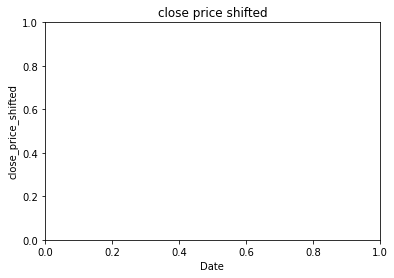

In [41]:
plt.title("close price shifted")
plt.xlabel('Date')
plt.ylabel('close_price_shifted')

In [48]:

# setting the features dataset for prediction  
cols = ['close_price', 'compound', 'compound_shifted', 'volume', 'open_price', 'high', 'low']
x = data[cols]
x

,close_price,compound,compound_shifted,volume,open_price,high,low
1,184.910004,0.0000,-0.2263,35264500.0,185.750000,186.199997,183.960007
2,183.630005,-0.2263,0.0000,26799100.0,185.029999,186.600006,183.490005
3,185.660004,0.0000,0.3818,31261300.0,184.809998,185.850006,183.940002
4,183.429993,0.3818,0.0000,29119500.0,185.399994,186.669998,183.289993
5,183.509995,0.0000,0.0000,20826900.0,183.190002,184.460007,182.539993
...,...,...,...,...,...,...,...
246,252.460007,-0.3400,0.0000,27010100.0,252.149994,254.300003,251.169998
247,247.179993,0.0000,0.3400,29299900.0,250.869995,251.729996,247.119995
248,246.229996,0.3400,0.0000,33641600.0,244.550003,246.600006,242.570007
249,239.000000,0.0000,0.0000,36684400.0,242.169998,244.380005,238.070007


In [49]:

# scaling the feature dataset
import math
scaler_x = preprocessing.MinMaxScaler (feature_range=(-1, 1))
x = np.array(x).reshape((len(x) ,len(cols)))
x = scaler_x.fit_transform(x)

# scaling the target variable
scaler_y = preprocessing.MinMaxScaler (feature_range=(-1, 1))
y = np.array (y).reshape ((len( y), 1))
y = scaler_y.fit_transform (y)

# displaying the scaled feature dataset and the target variable
abs(x), abs(y)

(array([[0.91287055, 0.01966627, 0.28939213, ..., 0.86373674, 0.89630561,
         0.82386023],
        [0.94464414, 0.28939213, 0.01966627, ..., 0.88141415, 0.88645317,
         0.83510833],
        [0.89425321, 0.01966627, 0.43539928, ..., 0.8868156 , 0.90492608,
         0.82433899],
        ...,
        [0.60928376, 0.38557807, 0.01966627, ..., 0.57991653, 0.59137939,
         0.57879611],
        [0.42981261, 0.01966627, 0.01966627, ..., 0.52148283, 0.53669956,
         0.47110197],
        [0.52984981, 0.01966627, 0.01966627, ..., 0.51239874, 0.56674885,
         0.55127406]]), array([[9.44644140e-01],
        [8.94253205e-01],
        [9.49609065e-01],
        [9.47623165e-01],
        [9.95779745e-01],
        [9.89822416e-01],
        [1.00000000e+00],
        [9.54077055e-01],
        [9.64502721e-01],
        [9.12870555e-01],
        [9.01700220e-01],
        [9.62268739e-01],
        [8.56025754e-01],
        [8.27230821e-01],
        [7.91485459e-01],
        [6.16730777e

In [50]:
# preparing training and test dataset
X_train = x[0 : train_end,]
X_test = x[train_end+1 : len(x),]    
y_train = y[0 : train_end] 
y_test = y[train_end+1 : len(y)]  

# printing the shape of the training and the test datasets
print('Number of rows and columns in Training set X:', X_train.shape, 'and y:', y_train.shape)
print('Number of rows and columns in Test set X:', X_test.shape, 'and y:', y_test.shape)

Number of rows and columns in Training set X: (200, 7) and y: (200, 1)
Number of rows and columns in Test set X: (49, 7) and y: (49, 1)


In [51]:
#reshaping dataset

print('Shape of Training set X:', X_train.shape)
print('Shape of Test set X:', X_test.shape)

Shape of Training set X: (200, 7)
Shape of Test set X: (49, 7)


In [52]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((200, 7), (200, 1), (49, 7), (49, 1))

In [53]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor

# create regressor object





In [54]:
rg = RandomForestRegressor(random_state = 42, n_estimators = 500, criterion='mse', max_depth = 30, min_samples_leaf=2, min_samples_split=5, n_jobs=1)

In [55]:
from sklearn.multioutput import RegressorChain

In [56]:
model = RegressorChain(rg)
model.fit(X_train, y_train)

RegressorChain(base_estimator=RandomForestRegressor(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    criterion='mse',
                                                    max_depth=30,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=2,
                                                    min_samples_split=5,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=500, n_jobs=1,
                                                   

In [57]:
pred = model.predict(X_test)
pred

array([[0.14383137],
       [0.19593093],
       [0.29189298],
       [0.29808083],
       [0.33726403],
       [0.25931796],
       [0.26395174],
       [0.34448044],
       [0.33851483],
       [0.27709485],
       [0.21478944],
       [0.28610761],
       [0.36880655],
       [0.34764508],
       [0.30205534],
       [0.27829795],
       [0.27212514],
       [0.23974276],
       [0.35554397],
       [0.47410632],
       [0.52761842],
       [0.54919269],
       [0.55157744],
       [0.55642008],
       [0.55507069],
       [0.55040895],
       [0.54984954],
       [0.55429631],
       [0.54876824],
       [0.55201654],
       [0.55112347],
       [0.55674828],
       [0.55514615],
       [0.55414032],
       [0.5573438 ],
       [0.5546245 ],
       [0.54427667],
       [0.54654685],
       [0.5454638 ],
       [0.54922443],
       [0.55674828],
       [0.5492999 ],
       [0.55672689],
       [0.55096216],
       [0.55245758],
       [0.55040895],
       [0.54427667],
       [0.388

In [62]:

from sklearn.metrics import mean_squared_error

In [63]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
prediction=rf.predict(X_test)
print(prediction[:10])
print(y_test[:10])
print(mean_squared_error(pred,y_test))

[0.10030541 0.18698525 0.28515086 0.29892518 0.33859254 0.24426714
 0.24856653 0.37115304 0.34889163 0.25677053]
[[0.14161601]
 [0.30023583]
 [0.26647635]
 [0.38339348]
 [0.34913743]
 [0.32580363]
 [0.39779094]
 [0.3811591 ]
 [0.22427709]
 [0.21509266]]
0.0497245950188302


In [65]:
from sklearn.ensemble import AdaBoostRegressor


In [67]:
adb = AdaBoostRegressor()
adb.fit(X_train, y_train)
predictions = adb.predict(X_test)
print(mean_squared_error(predictions, y_test))

0.07420398275083101


In [69]:
from sklearn.tree import DecisionTreeRegressor
dec_tree = DecisionTreeRegressor()
dec_tree.fit(X_train, y_train)
predictions = dec_tree.predict(X_test)
print(predictions[:10])
print(y_test[:10])
print(mean_squared_error(predictions,y_test))

[0.12523267 0.26548359 0.31934974 0.31934974 0.25505793 0.18133317
 0.18133317 0.52910514 0.52910514 0.26548359]
[[0.14161601]
 [0.30023583]
 [0.26647635]
 [0.38339348]
 [0.34913743]
 [0.32580363]
 [0.39779094]
 [0.3811591 ]
 [0.22427709]
 [0.21509266]]
0.05322923035879702
